In [266]:
import numpy as np 
import random
import matplotlib.pyplot as plt # Graphical library

## Helper class

In [ ]:
# This class is used ONLY for graphics

class GraphicsMaze(object):

  def __init__(self, shape, locations, default_reward, obstacle_locs, absorbing_locs, absorbing_rewards, absorbing):

    self.shape = shape
    self.locations = locations
    self.absorbing = absorbing

    # Walls
    self.walls = np.zeros(self.shape)
    for ob in obstacle_locs:
      self.walls[ob] = 20

    # Rewards
    self.rewarders = np.ones(self.shape) * default_reward
    for i, rew in enumerate(absorbing_locs):
      self.rewarders[rew] = 10 if absorbing_rewards[i] > 0 else -10

    # Print the map to show it
    self.paint_maps()

  def paint_maps(self):
    """
    Print the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders)
    plt.show()

  def paint_state(self, state):
    """
    Print one state on the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    states = np.zeros(self.shape)
    states[state] = 30
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders + states)
    plt.show()

  def draw_deterministic_policy(self, Policy):
    """
    Draw a deterministic policy
    input: Policy {np.array} -- policy to draw (should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, action in enumerate(Policy):
      if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
        continue
      arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
      action_arrow = arrows[action] # Take the corresponding action
      location = self.locations[state] # Compute its location on graph
      plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
    plt.show()

  def draw_policy(self, Policy):
    """
    Draw a policy (draw an arrow in the most probable direction)
    input: Policy {np.array} -- policy to draw as probability
    output: /
    """
    deterministic_policy = np.array([np.argmax(Policy[row,:]) for row in range(Policy.shape[0])])
    self.draw_deterministic_policy(deterministic_policy)

  def draw_value(self, Value):
    """
    Draw a policy value
    input: Value {np.array} -- policy values to draw
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, value in enumerate(Value):
      if(self.absorbing[0, state]): # If it is an absorbing state, don't plot any value
        continue
      location = self.locations[state] # Compute the value location on graph
      plt.text(location[1], location[0], round(value,2), ha='center', va='center') # Place it on graph
    plt.show()

  def draw_deterministic_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple deterministic policies
    input: Policies {np.array of np.array} -- array of policies to draw (each should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Policies)): # Go through all policies
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each policy
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, action in enumerate(Policies[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
          continue
        arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
        action_arrow = arrows[action] # Take the corresponding action
        location = self.locations[state] # Compute its location on graph
        plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graph given as argument
    plt.show()

  def draw_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policies (draw an arrow in the most probable direction)
    input: Policy {np.array} -- array of policies to draw as probability
    output: /
    """
    deterministic_policies = np.array([[np.argmax(Policy[row,:]) for row in range(Policy.shape[0])] for Policy in Policies])
    self.draw_deterministic_policy_grid(deterministic_policies, title, n_columns, n_lines)

  def draw_value_grid(self, Values, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policy values
    input: Values {np.array of np.array} -- array of policy values to draw
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Values)): # Go through all values
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each value
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, value in enumerate(Values[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any value
          continue
        location = self.locations[state] # Compute the value location on graph
        plt.text(location[1], location[0], round(value,1), ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graoh given as argument
    plt.show()


## Maze class

In [ ]:
# This class define the Maze environment

class Maze(object):

  def __init__(self):
    """
    Maze initialisation.
    input: /
    output: /
    """
    
    self._prob_success = 0.98 # float
    self._gamma = 0.8 # float
    self._goal = 1 # integer 

    # Build the maze
    self._build_maze()
                              

  # Functions used to build the Maze environment 
  def _build_maze(self):
    """
    Maze initialisation.
    input: /
    output: /
    """

    # Properties of the maze
    self._shape = (13, 10)
    self._obstacle_locs = [
                          (1,0), (1,1), (1,2), (1,3), (1,4), (1,7), (1,8), (1,9), \
                          (2,1), (2,2), (2,3), (2,7), \
                          (3,1), (3,2), (3,3), (3,7), \
                          (4,1), (4,7), \
                          (5,1), (5,7), \
                          (6,5), (6,6), (6,7), \
                          (8,0), \
                          (9,0), (9,1), (9,2), (9,6), (9,7), (9,8), (9,9), \
                          (10,0)
                         ] # Location of obstacles
    self._absorbing_locs = [(2,0), (2,9), (10,1), (12,9)] # Location of absorbing states
    self._absorbing_rewards = [ (500 if (i == self._goal) else -50) for i in range (4) ]
    self._starting_locs = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9)] #Reward of absorbing states
    self._default_reward = -1 # Reward for each action performs in the environment
    self._max_t = 500 # Max number of steps in the environment

    # Actions
    self._action_size = 4
    self._direction_names = ['N','E','S','W'] # Direction 0 is 'N', 1 is 'E' and so on
        
    # States
    self._locations = []
    for i in range (self._shape[0]):
      for j in range (self._shape[1]):
        loc = (i,j) 
        # Adding the state to locations if it is no obstacle
        if self._is_location(loc):
          self._locations.append(loc)
    self._state_size = len(self._locations)

    # Neighbours - each line is a state, ranked by state-number, each column is a direction (N, E, S, W)
    self._neighbours = np.zeros((self._state_size, 4)) 
    
    for state in range(self._state_size):
      loc = self._get_loc_from_state(state)

      # North
      neighbour = (loc[0]-1, loc[1]) # North neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('N')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('N')] = state

      # East
      neighbour = (loc[0], loc[1]+1) # East neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('E')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('E')] = state

      # South
      neighbour = (loc[0]+1, loc[1]) # South neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('S')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('S')] = state

      # West
      neighbour = (loc[0], loc[1]-1) # West neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('W')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('W')] = state

    # Absorbing
    self._absorbing = np.zeros((1, self._state_size))
    for a in self._absorbing_locs:
      absorbing_state = self._get_state_from_loc(a)
      self._absorbing[0, absorbing_state] = 1

    # Transition matrix
    self._T = np.zeros((self._state_size, self._state_size, self._action_size)) # Empty matrix of domension S*S*A
    for action in range(self._action_size):
      for outcome in range(4): # For each direction (N, E, S, W)
        # The agent has prob_success probability to go in the correct direction
        if action == outcome:
          prob = 1 - 3.0 * ((1.0 - self._prob_success) / 3.0) # (theoritically equal to self.prob_success but avoid rounding error and garanty a sum of 1)
        # Equal probability to go into one of the other directions
        else:
          prob = (1.0 - self._prob_success) / 3.0
          
        # Write this probability in the transition matrix
        for prior_state in range(self._state_size):
          # If absorbing state, probability of 0 to go to any other states
          if not self._absorbing[0, prior_state]:
            post_state = self._neighbours[prior_state, outcome] # Post state number
            post_state = int(post_state) # Transform in integer to avoid error
            self._T[prior_state, post_state, action] += prob

    # Reward matrix
    self._R = np.ones((self._state_size, self._state_size, self._action_size)) # Matrix filled with 1
    self._R = self._default_reward * self._R # Set default_reward everywhere
    for i in range(len(self._absorbing_rewards)): # Set absorbing states rewards
      post_state = self._get_state_from_loc(self._absorbing_locs[i])
      self._R[:,post_state,:] = self._absorbing_rewards[i]

    # Creating the graphical Maze world
    self._graphics = GraphicsMaze(self._shape, self._locations, self._default_reward, self._obstacle_locs, self._absorbing_locs, self._absorbing_rewards, self._absorbing)
    
    # Reset the environment
    self.reset()


  def _is_location(self, loc):
    """
    Is the location a valid state (not out of Maze and not an obstacle)
    input: loc {tuple} -- location of the state
    output: _ {bool} -- is the location a valid state
    """
    if (loc[0] < 0 or loc[1] < 0 or loc[0] > self._shape[0]-1 or loc[1] > self._shape[1]-1):
      return False
    elif (loc in self._obstacle_locs):
      return False
    else:
      return True


  def _get_state_from_loc(self, loc):
    """
    Get the state number corresponding to a given location
    input: loc {tuple} -- location of the state
    output: index {int} -- corresponding state number
    """
    return self._locations.index(tuple(loc))


  def _get_loc_from_state(self, state):
    """
    Get the state number corresponding to a given location
    input: index {int} -- state number
    output: loc {tuple} -- corresponding location
    """
    return self._locations[state]

  # Getter functions used only for DP agents
  def get_T(self):
    return self._T

  def get_R(self):
    return self._R

  def get_absorbing(self):
    return self._absorbing

  # Getter functions used for DP, MC and TD agents
  def get_graphics(self):
    return self._graphics

  def get_action_size(self):
    return self._action_size

  def get_state_size(self):
    return self._state_size

  def get_gamma(self):
    return self._gamma

  # Functions used to perform episodes in the Maze environment
  def reset(self):
    """
    Reset the environment state to one of the possible starting states
    input: /
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """
    self._t = 0
    self._state = self._get_state_from_loc(self._starting_locs[random.randrange(len(self._starting_locs))])
    self._reward = 0
    self._done = False
    return self._t, self._state, self._reward, self._done

  def step(self, action):
    """
    Perform an action in the environment
    input: action {int} -- action to perform
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """

    # If environment already finished, print an error
    if self._done or self._absorbing[0, self._state]:
      print("Please reset the environment")
      return self._t, self._state, self._reward, self._done

    # Drawing a random number used for probaility of next state
    probability_success = random.uniform(0,1)

    # Look for the first possible next states (so get a reachable state even if probability_success = 0)
    new_state = 0
    while self._T[self._state, new_state, action] == 0: 
      new_state += 1
    assert self._T[self._state, new_state, action] != 0, "Selected initial state should be probability 0, something might be wrong in the environment."

    # Find the first state for which probability of occurence matches the random value
    total_probability = self._T[self._state, new_state, action]
    while (total_probability < probability_success) and (new_state < self._state_size-1):
     new_state += 1
     total_probability += self._T[self._state, new_state, action]
    assert self._T[self._state, new_state, action] != 0, "Selected state should be probability 0, something might be wrong in the environment."
    
    # Setting new t, state, reward and done
    self._t += 1
    self._reward = self._R[self._state, new_state, action]
    self._done = self._absorbing[0, new_state] or self._t > self._max_t
    self._state = new_state
    return self._t, self._state, self._reward, self._done

## DP Agent

In [ ]:
# This class define the Dynamic Programing agent 

class DP_agent(object):

  def solve(self, env):
    """
    Solve a given Maze environment using Dynamic Programming
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - V {np.array} -- Corresponding value function 
    """
    
    # Initialisation
    action_size = env.get_action_size()
    state_size = env.get_state_size()
    absorbing = env.get_absorbing()
    gamma = env.get_gamma()
    T = env.get_T()
    R = env.get_R()
    policy = np.zeros((state_size, action_size)) 
    V = np.zeros(state_size)
    Vnew = np.copy(V)
    threshold = 0.001
    delta = 2 * threshold
    epochs = 0

    while delta >= threshold: # Use value iteration from lab 1
      Vnew[:] = 0 # Reset
      policy[:, :] = 0 # Reset
      for current_state in range(state_size):
        if not absorbing[0, current_state]:
          Q_values = [] # Save rewards for each acition in each state and reset in next action
          for action in range(action_size):
            Q = np.sum(T[current_state, :, action] * (R[current_state, :, action] + gamma * V[:]))
            Q_values.append(Q)
          Vnew[current_state] = round(max(Q_values), 1) # Max value
          policy[current_state, np.argmax(Q_values)] = 1 # Direction
      delta = max(abs(Vnew-V))
      V = np.copy(Vnew) # Save learning in V
      epochs += 1 # Update epochs
    ####
  
    return policy, V

## MC agent

In [ ]:
# This class define the Monte-Carlo agent

class MC_agent(object):
  
  def solve(self, env):
    """
    Solve a given Maze environment using Monte Carlo learning
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - values {list of np.array} -- List of successive value functions for each episode 
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode 
    """

    # Initialisation
    state_size = env.get_state_size()
    action_size = env.get_action_size()
    gamma = env.get_gamma()
    Q = np.random.rand(state_size, action_size)
    N = np.zeros((state_size, action_size))  # Count of visits
    V = np.zeros(state_size)
    policy = np.zeros((state_size, action_size))
    policy[:, ] = np.random.dirichlet(np.ones(action_size)) # arbitrary
    values = []
    total_rewards = []
    episodes = 0
    epsilon = 1


    #### 
    while episodes < 300:
      t, state, reward, done = env.reset() # Reset environment
      V = np.zeros(state_size) # Reset V
      trace = []
      while not done: # Episode
        action = np.random.choice(action_size, p=policy[state, :])
        t, next_state, reward, done = env.step(action)
        trace.append((state, action, reward))
        state = next_state
      

      # Get values of each state
      for state in range(state_size):
        for i in range(len(trace)):
          if trace[i][0] == state:
            V[state] = sum(trace[k][2] for k in range(i, len(trace)))
            break
      values_extended = [v for v in values]
      values_extended.append(V)
      V = np.mean(values_extended, axis=0)
      values.append(np.round(np.array(V), 1))
  
      # Update Q values
      trace = list(reversed(trace)) # reverse trace
      non_discounted_rewards = 0 # Rewards of each first pair state action
      G = 0 # Total rewards for each episode
      visited_states = set() # Set of visited pairs state action
      for i in range(len(trace)): # Last state is absorbing
        state, action, reward = trace[i]
        non_discounted_rewards += reward
        G = G * gamma + reward
        if (state, action) not in visited_states: # Check if the pair sate action was was the first one in the trace
          visited_states.add((state, action))
          N[state, action] += 1
          Q[state, action] += (G - Q[state, action]) / N[state, action]  # Update Q with the mean of the rewards
          best_action = np.argmax(Q[state]) # Optimal action
          policy[state, :] = np.array([1 - epsilon + epsilon/action_size if i == best_action else epsilon/action_size for i in range(action_size)]) # Update epolicy
      total_rewards.append(float(non_discounted_rewards))

      epsilon = max(0.2, epsilon*0.99) # update epsilon
      episodes += 1

        ####`
        
    return policy, values, total_rewards

## TD agent

In [ ]:
# This class define the Temporal-Difference agent

class TD_agent(object):

  def solve(self, env):
    """
    Solve a given Maze environment using Temporal Difference learning
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - values {list of np.array} -- List of successive value functions for each episode 
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode 
    """


    # Initialisation
    state_size = env.get_state_size()
    action_size = env.get_action_size()
    gamma = env.get_gamma()
    Q = np.random.rand(state_size, action_size) 
    V = np.zeros(state_size)
    policy = np.zeros((state_size, action_size)) 
    policy[:,] = np.random.dirichlet((np.ones(action_size)))
    values = []
    total_rewards = []
    episodes = 0
    epsilon = 1
    lr = 0.1

    #### 
    while episodes < 250:
      t, state, reward, done = env.reset()
      episode_rewards = 0
      while not done:
        action = np.random.choice(action_size, p=policy[state, :])
        t, next_state, reward, done = env.step(action)
        episode_rewards += reward
        Q[state, action] +=  lr * (reward + gamma * np.max(Q[next_state, :])  - Q[state, action])
        V[state] += lr * (reward + gamma * V[next_state] - V[state])
        state = next_state
      total_rewards.append(episode_rewards)
      values.append(np.round(V, 1))
      
      # Update epolicy
      for state in range(state_size):
        action = np.argmax(Q[state, :]) 
        policy[state, :] = np.array([1 - epsilon + epsilon/action_size if i == action else epsilon/action_size for i in range(action_size)])

      epsilon = max(0.2, epsilon*0.9) # update epsilon
      episodes += 1

    return policy, values, total_rewards

## Example main

Creating the Maze:



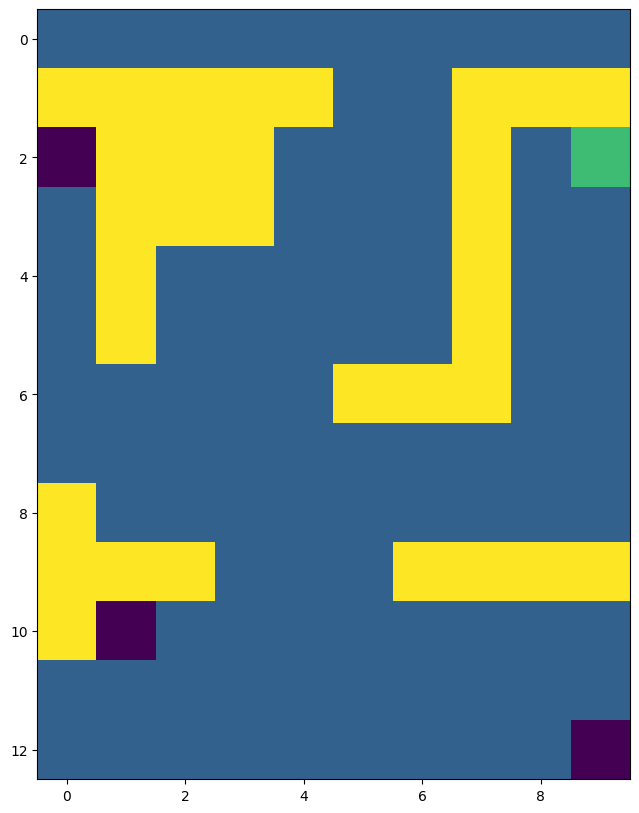

Results of the DP agent:



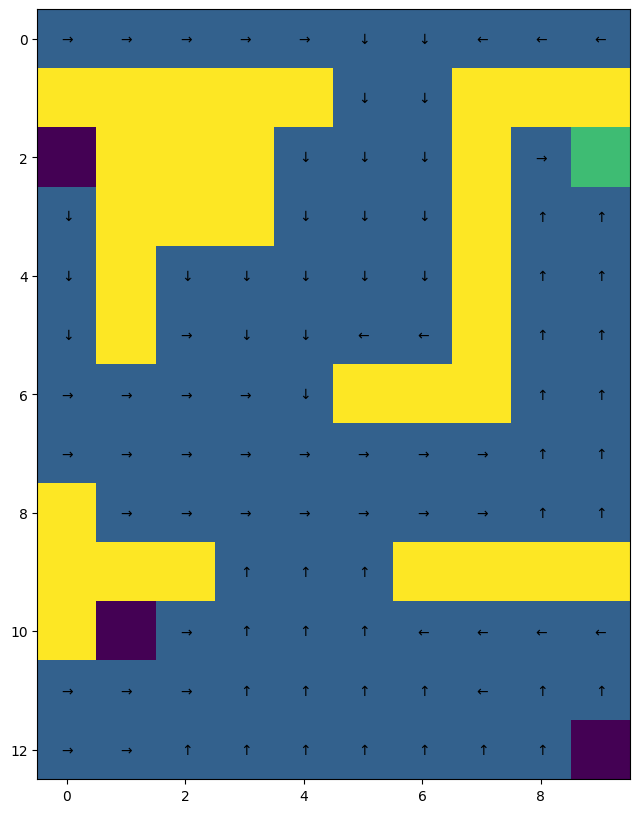

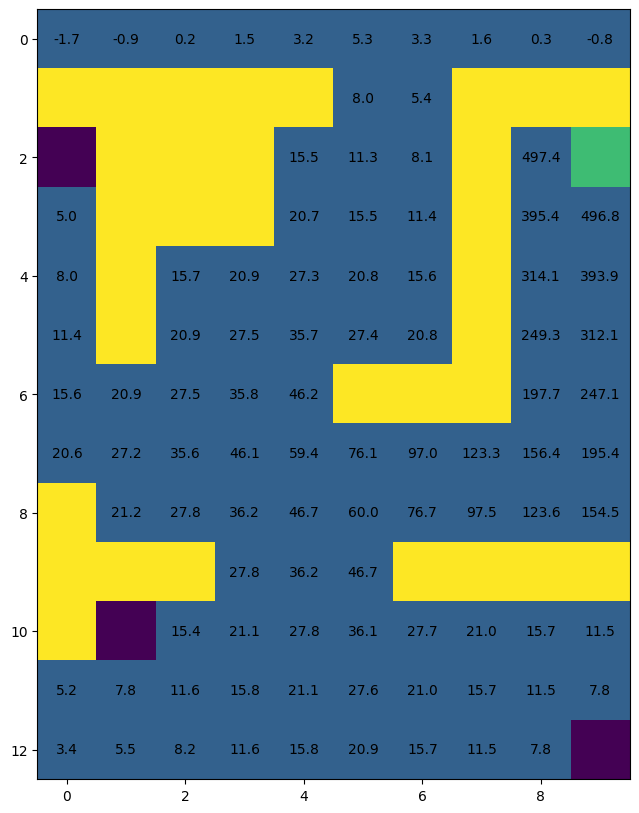

Results of the MC agent:



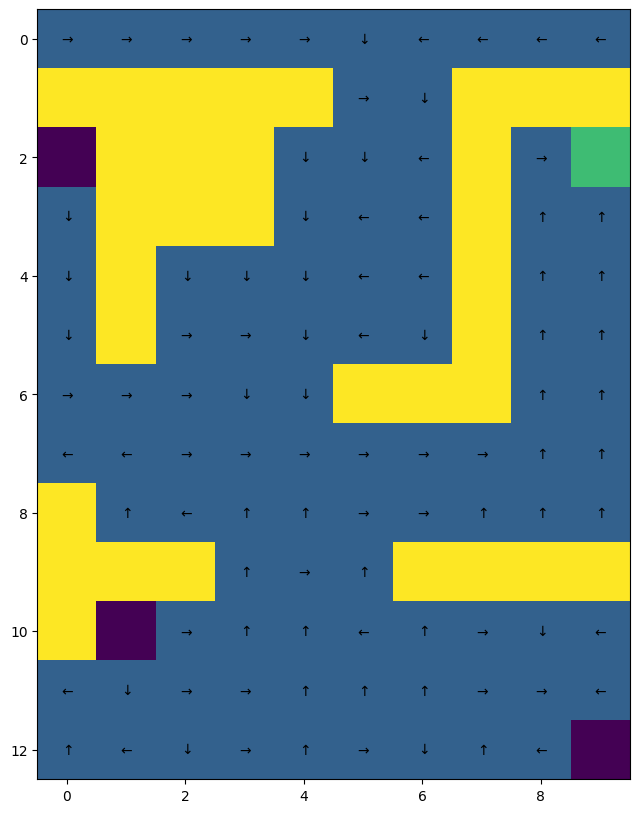

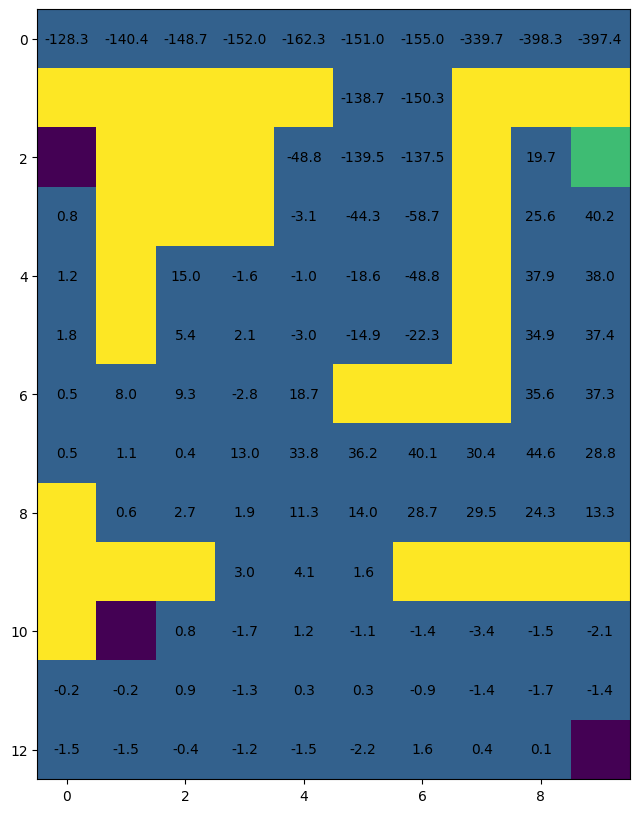

Results of the TD agent:



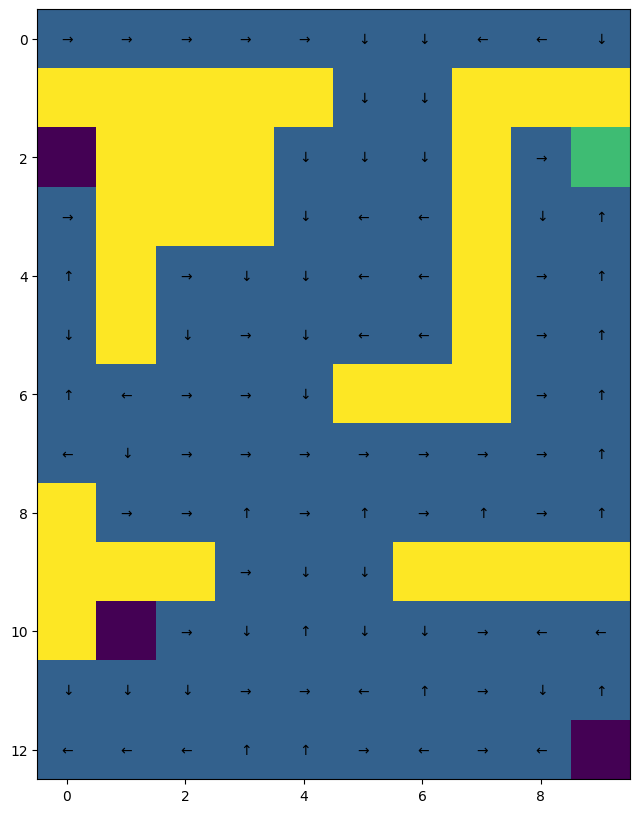

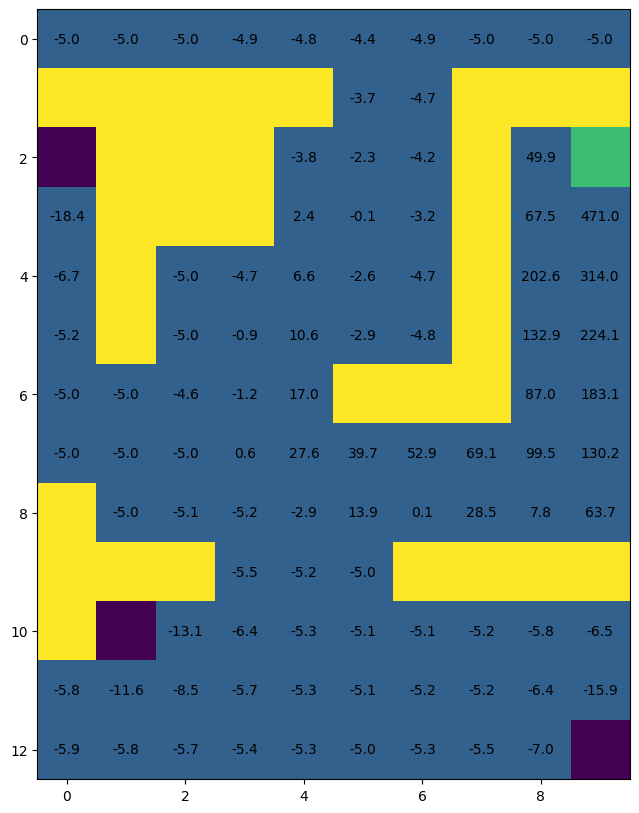

In [ ]:

# Defining the environment

print("Creating the Maze:\n")
maze = Maze()

# Question 1: Dynamic programming

dp_agent = DP_agent()
dp_policy, dp_value = dp_agent.solve(maze)

print("Results of the DP agent:\n")
maze.get_graphics().draw_policy(dp_policy)
maze.get_graphics().draw_value(dp_value)


# Monte-Carlo learning

mc_agent = MC_agent()
mc_policy, mc_values, total_rewards = mc_agent.solve(maze)

print("Results of the MC agent:\n")
maze.get_graphics().draw_policy(mc_policy)
maze.get_graphics().draw_value(mc_values[-1])


# Temporal-Difference learning

td_agent = TD_agent()
td_policy, td_values, total_rewards = td_agent.solve(maze)

print("Results of the TD agent:\n")
maze.get_graphics().draw_policy(td_policy)
maze.get_graphics().draw_value(td_values[-1])



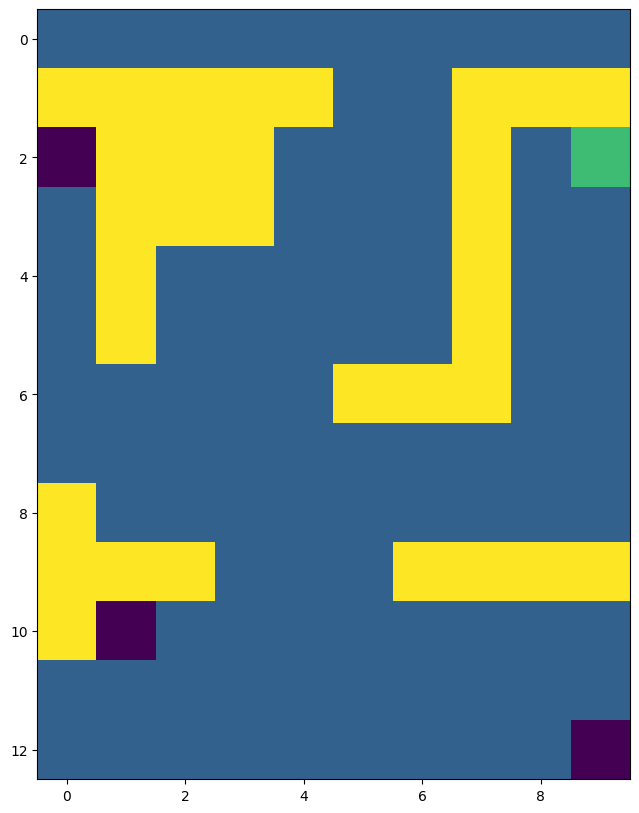

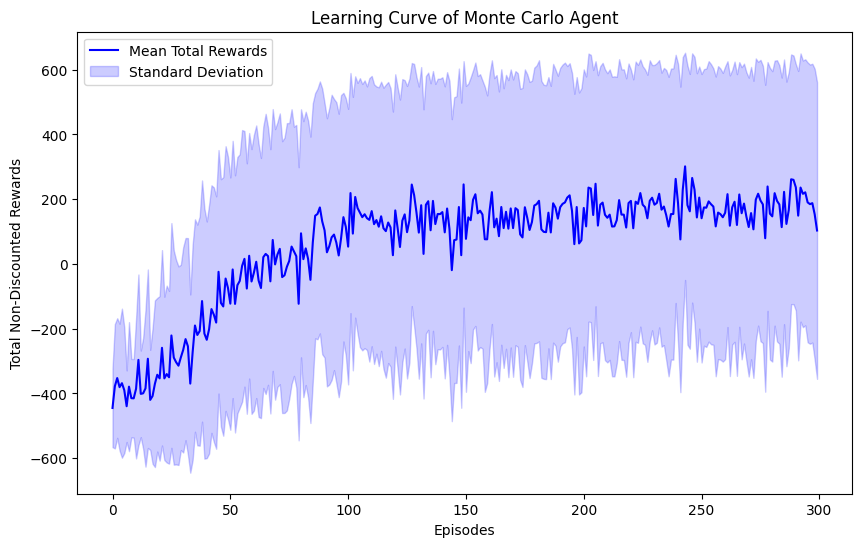

In [276]:
n_episodes = 300
n_trains = 25
rewards = np.zeros((n_trains, n_episodes))
maze = Maze()
for i in range(n_trains):
    mc_agent = MC_agent()
    mc_policy, mc_values, total_rewards = mc_agent.solve(maze)
    rewards[i] = np.array(total_rewards)

mean_rewards = np.mean(rewards, axis=0)
std_rewards = np.std(rewards, axis=0)

# Plot
episodes = np.arange(n_episodes)
plt.figure(figsize=(10, 6))
plt.plot(episodes, mean_rewards, label="Mean Total Rewards", color="b")
plt.fill_between(episodes, mean_rewards - std_rewards, mean_rewards + std_rewards, color="b", alpha=0.2, label="Standard Deviation")
plt.xlabel("Episodes")
plt.ylabel("Total Non-Discounted Rewards")
plt.title("Learning Curve of Monte Carlo Agent")
plt.legend()
plt.show()

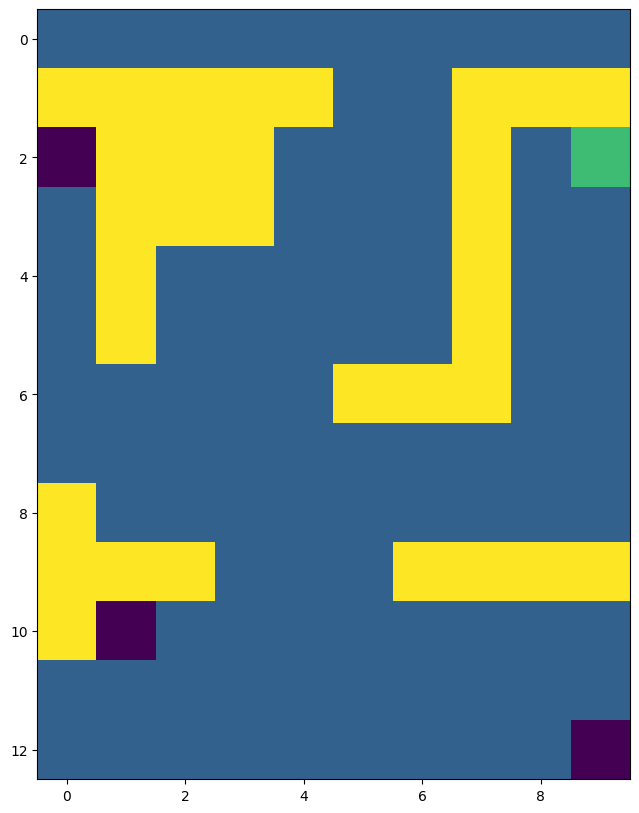

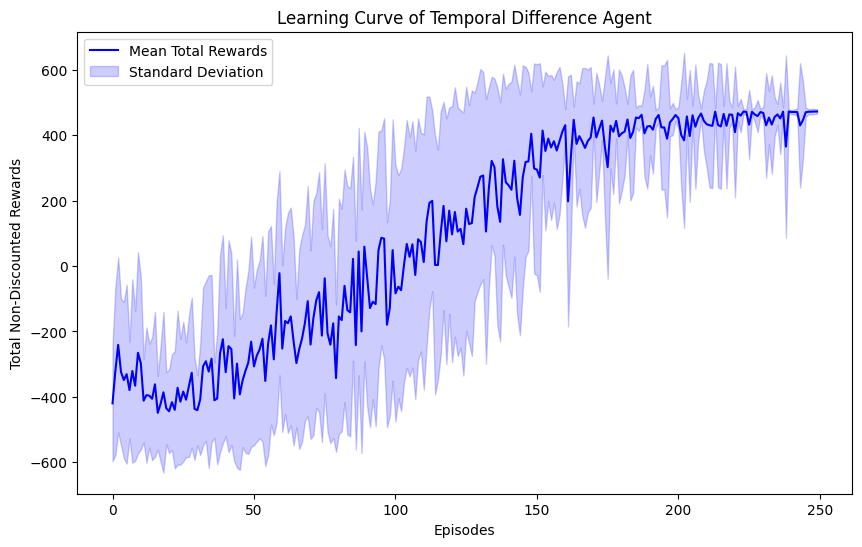

In [275]:
n_episodes = 250
n_trains = 25
rewards = np.zeros((n_trains, n_episodes))
maze = Maze()
for i in range(n_trains):
    tf_agent = TD_agent()
    mc_policy, mc_values, total_rewards = tf_agent.solve(maze)
    rewards[i] = np.array(total_rewards)

mean_rewards = np.mean(rewards, axis=0)
std_rewards = np.std(rewards, axis=0)

# Plot
episodes = np.arange(n_episodes)
plt.figure(figsize=(10, 6))
plt.plot(episodes, mean_rewards, label="Mean Total Rewards", color="b")
plt.fill_between(episodes, mean_rewards - std_rewards, mean_rewards + std_rewards, color="b", alpha=0.2, label="Standard Deviation")
plt.xlabel("Episodes")
plt.ylabel("Total Non-Discounted Rewards")
plt.title("Learning Curve of Temporal Difference Agent")
plt.legend()
plt.show()